<h1><u>CMSC 320 - Project 2: Moneyball</u></h1>
<h3><i>By William Bermudez & Aastha Khanna</i></h3>
<br/>

This project is about the book/film <i>Moneyball</i>, which depcits events occuring in the early 2000s surrounding the Oakland A's baseball team and its computer-generated methods to find a winning team given a small budget which revolutionized MLB roster selection.

<h2><u><i> Part 1: Wrangling </i></u></h2>

<h3><span style="color:#004895"><u>Problem 1: Dataframe w/ Payroll & Win Percentages</u></span></h3>

To start analyzing our data, we have to grab it from the sqlite file given to us first. We do that with the following code below, and look into a table labelled <i>Salaries.</i> From that table, we grabbed the columns labelled <b>Year (yearID)</b> and <b>Team (teamID)</b>, and created a column labelled <b>Payroll</b>, which is the sum of the salaries of all the players on the team.  We then looked into another table called <i>Teams</i>, which gave us the number of total games played and total games won. We used those two values to make a <b>Percentage</b> column that gives us the percent of games each team won each year.

In [9]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import numpy as np

conn = sql.connect('lahman2014.sqlite') #Establishes connection to file.
query = "SELECT yearID as Year, teamID as Team, " + \
        "sum(salary) as Payroll FROM Salaries GROUP BY Year, Team"
payroll_t = pd.read_sql(query, conn) #Makes table w/ Year, Team, & Total Payroll

query = "SELECT yearID as Year, teamID as Team, " + \
        "(CAST(W as float) / CAST(G as float)) * 100 as Percentage " + \
        "FROM Teams GROUP BY Year, Team"
perc_t = pd.read_sql(query, conn) #Makes table w/ Year, Team, & Win Percentage

base_t = payroll_t.merge(perc_t, how = "left", on = ["Year", "Team"])
base_t = base_t.loc[base_t.Year > 1989] #Takes out any year before 1990
base_t = base_t.reset_index().drop('index', 1)
base_t

Year Team      Payroll  Percentage
0    1990  ATL   14555501.0   40.123457
1    1990  BAL    9680084.0   47.204969
2    1990  BOS   20558333.0   54.320988
3    1990  CAL   21720000.0   49.382716
4    1990  CHA    9491500.0   58.024691
5    1990  CHN   13624000.0   47.530864
6    1990  CIN   14370000.0   56.172840
7    1990  CLE   14487000.0   47.530864
8    1990  DET   17593238.0   48.765432
9    1990  HOU   18330000.0   46.296296
10   1990  KCA   23361084.0   46.583851
11   1990  LAN   21318704.0   53.086420
12   1990  MIN   14602000.0   45.679012
13   1990  ML4   19719167.0   45.679012
14   1990  MON   16586388.0   52.469136
15   1990  NYA   20912318.0   41.358025
16   1990  NYN   21722834.0   56.172840
17   1990  OAK   19887501.0   63.580247
18   1990  PHI   13173667.0   47.530864
19   1990  PIT   15556000.0   58.641975
20   1990  SDN   17588334.0   46.296296
21   1990  SEA   12553667.0   47.530864
22   1990  SFN   19335333.0   52.469136
23   1990  SLN   20523334.0   43.209877
24   1990  TEX   14874372.0   51.234568
25   1990  TOR   17756834.0   53.086420
26   1991  ATL   18403500.0   58.024691
27   1991  BAL   17519000.0   41.358025
28   1991  BOS   35167500.0   51.851852
29   1991  CAL   33060001.0   50.000000
..    ...  ...          ...         ...
700  2014  BAL  103416000.0   59.259259
701  2014  BOS  139019929.0   43.827160
702  2014  CHA   81830500.0   45.061728
703  2014  CHN   65522500.0   45.061728
704  2014  CIN  108217500.0   46.913580
705  2014  CLE   82151899.0   52.469136
706  2014  COL   95403500.0   40.740741
707  2014  DET  152855500.0   55.555556
708  2014  HOU   35116300.0   43.209877
709  2014  KCA   74594075.0   54.938272
710  2014  LAA  121988250.0   60.493827
711  2014  LAN  217014600.0   58.024691
712  2014  MIA   41836900.0   47.530864
713  2014  MIL  101217000.0   50.617284
714  2014  MIN   83762500.0   43.209877
715  2014  NYA  197543907.0   51.851852
716  2014  NYM   54806990.0         NaN
717  2014  NYN   30750000.0   48.765432
718  2014  OAK   72408400.0   54.320988
719  2014  PHI  180944967.0   45.061728
720  2014  PIT   77178000.0   54.320988
721  2014  SDN   75685700.0   47.530864
722  2014  SEA   92531100.0   53.703704
723  2014  SFG  143510167.0         NaN
724  2014  SFN   20000000.0   54.320988
725  2014  SLN  120693000.0   55.555556
726  2014  TBA   72689100.0   47.530864
727  2014  TEX  112255059.0   41.358025
728  2014  TOR  109920100.0   51.234568
729  2014  WAS  131983680.0   59.259259

[730 rows x 4 columns]

Looking at the code above, you can see that to get the data from two seperate tables we made two dataframes and called a <i>left join</i> on them, with the left being the payroll and the right being the percentages. We decided on this because some win percentages are null, but none of the payrolls are. Also, the percentages table went all the way back to the 1800s, which we don't really need since we have no salaries for them. So just another reason to use payroll as the left.

<h2><u><i>Part 2: Exploratory Data Analysis</i></u></h2>

<h3><span style="color:#004895"><u>Problem 2: Plots on Payroll Distribution Over Time</u></span></h3>

The following code takes all the info that we gathered in Part 1 and uses it to show how the payroll is distributed amongst all the teams in MLB. To do this, it takes the table <i>base_t</i> and makes a deep copy, calling it <i>dist_t</i>. It drops the <b>Percentage</b> column, and pivots the table accordingly, so that it's indexed by <b>Team</b>, with columns based on <b>Year</b>, and cells filled with <b>Payroll</b> values.

From there, we wanted to see how we could sort the teams and properly display them in a distribution. We took a look and saw what the most recent rankings in distribution were by sorting the teams in descending order based on the most recent year we have, 2014. From there we gathered a list of the teams from most payroll that year to least. We got the following:

<ul><i>
    <li><b><span style="color:#806D04">#1-10: </span></b>LAN, NYA, PHI, DET, SFG, BOS, WAS, LAA, SLN, TEX</li>
    <li><b><span style="color:#6F6F6F">#11-19: </span></b>TOR, CIN, BAL, MIL, ARI, ATL, COL, SEA, MIN</li>
    <li><b><span style="color:#784E00">#20-28: </span></b>CLE, CHA, PIT, SDN, KCA, TBA, OAK, CHN, NYM</li>
    <li><b>#29-37: </b>MIA, HOU, NYN, SFN, MON, FLO, CAL, ML4, ANA</li>
</i></ul>

So we now have an order we'd like to sort them in. Then we picked a unique color for each team so that you could visually see a gradience in color between all of the teams from first to last, as you'll see in the charts below. We felt that pie charts would be a good way to show the distribtion since we can see how large or small the wedges become over time, and the inflation seen over the years never becomes an issue in terms of plotting. 

So with all this in mind we plotted a pie chart for each year, with red being LAN and the rest being the other colors of the spectrum as you traverse it (At some point the colors repeat, but they're on a grayer scale so they're distinguishable as low-ranking teams):

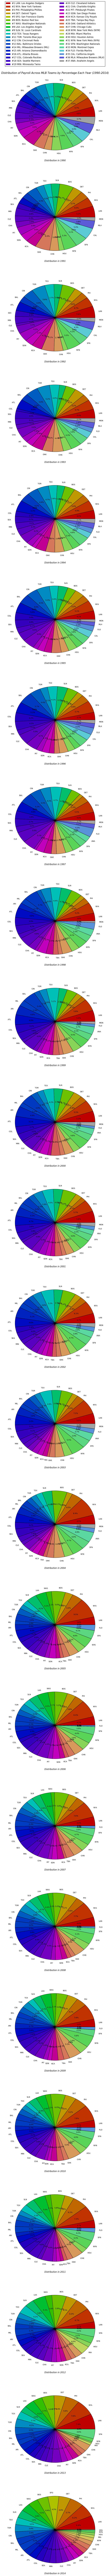

In [10]:
dist_t = base_t.copy(deep=True)
dist_t = dist_t.drop('Percentage', 1) #Drops Percentage column, isn't needed
dist_t = dist_t.pivot(index='Team', columns='Year', values='Payroll')
#Reformats the table so that it's indexed by team, with yearly columns and payroll values
dist_t = dist_t.sort_values([2014], ascending=False, na_position='last')
#Sorts the table by the 2014 column so that we can get the list of rankings

#LIST = ['LAN', 'NYA', 'PHI', 'DET', 'SFG', 'BOS', 'WAS', 'LAA', 'SLN', 'TEX'
#        'TOR', 'CIN', 'BAL', 'MIL', 'ARI', 'ATL', 'COL', 'SEA', 'MIN',
#        'CLE', 'CHA', 'PIT', 'SDN', 'KCA', 'TBA', 'OAK', 'CHN', 'NYM',
#        'MIA', 'HOU', 'NYN', 'SFN', 'MON', 'FLO', 'CAL', 'ML4', 'ANA']

colors = ['#C00000', '#C03300', '#C06600', '#C09900', '#ADC000', '#6DC000', 
         '#33C000', '#00C030', '#00C06D', '#00C0BA', '#008AC0', '#005DC0', 
         '#003AC0', '#003DC0', '#0023C0', '#000AC0', '#2300C0', '#3600C0', 
         '#4A00C0', '#5A00C0', '#7600C0', '#9D00C0', '#C000BD', '#C00093', 
         '#D55A5A', '#D5775A', '#D59A5A', '#D5C05A', '#BCD55A', '#89D55A', 
         '#5AD55A', '#5AD77F', '#5AD7A1', '#5ACAD7', '#5A90D7', '#5C5AD7', '#A3A3A4']
#Assigned colors for chart plotting.

LAN_key = mp.Patch(color='#C00000', label='#1 LAN: Los Angeles Dodgers') 
NYA_key = mp.Patch(color='#C03300', label='#2 NYA: New York Yankees') 
PHI_key = mp.Patch(color='#C06600', label='#3 PHI: Philadelphia Phillies') 
DET_key = mp.Patch(color='#C09900', label='#4 DET: Detroit Tigers') 
SFG_key = mp.Patch(color='#ADC000', label='#5 SFG: San Fransisco Giants') 
BOS_key = mp.Patch(color='#6DC000', label='#6 BOS: Boston Red Sox') 
WAS_key = mp.Patch(color='#33C000', label='#7 WAS: Washington Nationals') 
LAA_key = mp.Patch(color='#00C030', label='#8 LAA: Los Angeles Angels') 
SLN_key = mp.Patch(color='#00C06D', label='#9 SLN: St. Louis Cardinals') 
TEX_key = mp.Patch(color='#00C0BA', label='#10 TEX: Texas Rangers') 
TOR_key = mp.Patch(color='#008AC0', label='#11 TOR: Toronto Blue Jays')
CIN_key = mp.Patch(color='#005DC0', label='#12 CIN: Cincinnati Reds')
BAL_key = mp.Patch(color='#003AC0', label='#13 BAL: Baltimore Orioles') 
MIL_key = mp.Patch(color='#003DC0', label='#14 MIL: Milwaukee Brewers (MIL)') 
ARI_key = mp.Patch(color='#0023C0', label='#15 ARI: Arizona Diamondbacks') 
ATL_key = mp.Patch(color='#000AC0', label='#16 ATL: Atlanta Braves') 
COL_key = mp.Patch(color='#2300C0', label='#17 COL: Colorado Rockies') 
SEA_key = mp.Patch(color='#3600C0', label='#18 SEA: Seattle Mariners') 
MIN_key = mp.Patch(color='#4A00C0', label='#19 MIN: Minnesota Twins') 
CLE_key = mp.Patch(color='#5A00C0', label='#20 CLE: Cleveland Indians') 
CHA_key = mp.Patch(color='#7600C0', label='#21 CHA: Charlotte Knights') 
PIT_key = mp.Patch(color='#9D00C0', label='#22 PIT: Pittsburgh Pirates')
SDN_key = mp.Patch(color='#C000BD', label='#23 SDN: San Diego Pirates')
KCA_key = mp.Patch(color='#C00093', label='#24 KCA: Kansas City Royals')
TAB_key = mp.Patch(color='#D55A5A', label='#25 TBA: Tampa Bay Rays')
OAK_key = mp.Patch(color='#D5775A', label='#26 OAK: Oakland Athletics') 
CHN_key = mp.Patch(color='#D59A5A', label='#27 CHN: Chicago Cubs') 
NYM_key = mp.Patch(color='#D5C05A', label='#28 NYM: New York Mets (NYM)') 
MIA_key = mp.Patch(color='#BCD55A', label='#29 MIA: Miami Marlins') 
HOU_key = mp.Patch(color='#89D55A', label='#30 HOU: Houston Astros') 
NYN_key = mp.Patch(color='#5AD55A', label='#31 NYN: New York Mets (NYN)') 
SFN_key = mp.Patch(color='#5AD77F', label='#32 SFN: Washington Nationals') 
MON_key = mp.Patch(color='#5AD7A1', label='#33 MON: Montreal Expos') 
FLO_key = mp.Patch(color='#5ACAD7', label='#34 FLO: Florida Marlins') 
CAL_key = mp.Patch(color='#5A90D7', label='#35 CAL: California Angels') 
ML4_key = mp.Patch(color='#5C5AD7', label='#36 ML4: Milwaukee Brewers (ML4)')
ANA_key = mp.Patch(color='#A3A3A4', label='#37 ANA: Anaheim Angels')
#Individualized labels for each team for the plot legend.

all_keys = [LAN_key, NYA_key, PHI_key, DET_key, SFG_key, BOS_key, WAS_key, 
            LAA_key, SLN_key, TEX_key, TOR_key, CIN_key, BAL_key, MIL_key, 
            ARI_key, ATL_key, COL_key, SEA_key, MIN_key, CLE_key, CHA_key, 
            PIT_key, SDN_key, KCA_key, TAB_key, OAK_key, CHN_key, NYM_key, 
            MIA_key, HOU_key, NYN_key, SFN_key, MON_key, FLO_key, CAL_key, 
            ML4_key, ANA_key] #Collects all the labels above

i = 1990 #Starting year/index number
while (i < 2015): #Goes up to 2014
    row = dist_t[i] #Extracts year column from the distribution table
    plt.subplot(25, 1, i - 1989) #Adds subplot w/ proper position
    row.plot(kind='pie', colors=colors, autopct='%1.1f%%')
    #Creates the pie chart, with the colors and labels we made earlier. Also adds % labels.
    plt.xlabel('Distribution in '+str(i), fontsize=12, style='oblique') #Label for each subplot
    plt.ylabel('') #Removes extra label on side
    if i == 1990: #Adds main title and legend
        plt.title('Distribution of Payroll Across MLB Teams by Percentage Each Year (1990-2014)',
                  fontsize=15, style='oblique')
        plt.legend(bbox_to_anchor=(0., 1.1, 1., .1), loc=3,
           ncol=2, mode="expand", borderaxespad=0., 
           handles=all_keys)
    i += 1

fig_size = plt.gcf()
fig_size.set_size_inches(10, 250) #Readjusts size so pie charts can be seen clearly
plt.show()

<h3><span style="color:#009519"><u>Question 1: Statements Based on Distribution Plots</u></span></h3>

While looking at the pie charts over the years, we can see that more of the payroll percentage starts to go towards the top ranked teams instead of being evenly spread out. So we can say that over time, the variance in payroll increased since the winning teams started getting more money while the lower teams got less. There's more of an inequality in payroll distribution in general. 

We also noticed that over time, more wedges actually begin to appear in the charts. Since some teams didn't start to recieve payroll until some of the later years, they don't appear on the charts until later. That, coupled with the inequality we stated above, leads us to believe that the mean percentage of distribution goes down over the years, since the smaller wedges take up the majority of the chart and drive that average down.

So in short: <b>Variance is going up, Mean is going down</b>

<h3><span style="color:#004895"><u>Problem 3: Validation of Claims on Distribution Plots</u></span></h3>

To prove this, all we have to do is simply plot the mean and variance of all these teams over time and see what those graphs look like. Here we make a deep copy of the <i>dist_t</i> table we made and call it <i>stats_t</i>. We take that table of payroll values and transform them into percentages based on the sums of each column. Then it creates two new rows labelled <b>Mean</b> and <b>Variance</b>, which give us the stats on each year. From there we just plot them into a line:

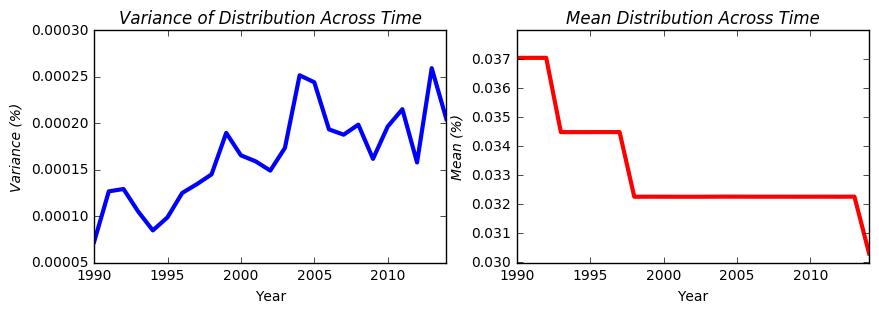

In [11]:
stats_t = dist_t.copy(deep=True) #Creates a deep copy of previous table
stats_t = stats_t.iloc[:, :].apply(lambda x: x / x.sum()) #Makes the values into percentages

stats_t.loc['Variance'] = stats_t.var() #Makes Variance Row
stats_t.loc['Mean'] = stats_t.mean() #Makes Mean Row

fig_size = plt.gcf()
fig_size.set_size_inches(10, 3) #Establishes plot size

plt.subplot(1, 2, 1) #Plots Variance in blue plot
stats_t.loc['Variance'].plot(kind='line', linewidth=3, c='b')
plt.title('Variance of Distribution Across Time', style='oblique')
plt.ylabel('Variance (%)', style='oblique')

plt.subplot(1, 2, 2) #Plots Mean in red plot
stats_t.loc['Mean'].plot(kind='line', linewidth=3, c='r')
plt.title('Mean Distribution Across Time', style='oblique')
plt.ylabel('Mean (%)', style='oblique')

plt.show()

As you can see from above, the variance is gradually increasing over the years, with a sharp clim in the early 2000s. The mean decreases in steep steps, proving our point and showing how drastic the change in average is once teams begin to join the payroll list.

<h3><span style="color:#004895"><u>Problem 4: Plotting Payroll vs Winning Percentage</u></span></h3>

Now we want to see if the amount of money a team recieves correlates to how well they do playing games. We're asked to divide up the data into five time periods, each five years long, and create scatter plots for each subsection with the x-axis as <b>Mean Payroll</b> and the y-axis as <b>Mean Percentage</b>. We use <i>pd.cut()</i> to split the data into bins, and create five seperate dataframes. 

We then take the mean of all the entries in each dataframe with the same <b>Team</b>, getting one average entry for each of the teams in the 5 years of the specific section. That's then plotted with labels onto five seperate scatter plots, with regression lines on each of them made with <i>pd.polyfit()</i>:

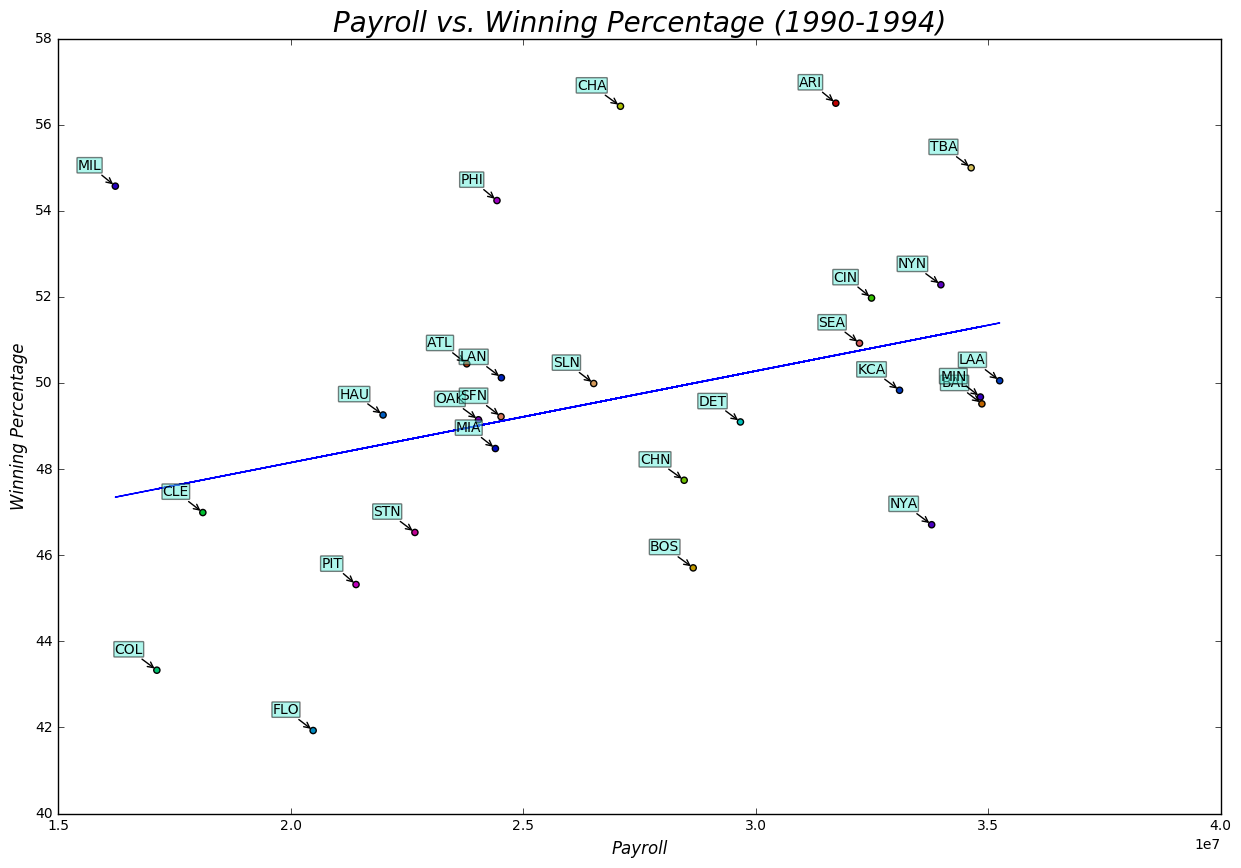

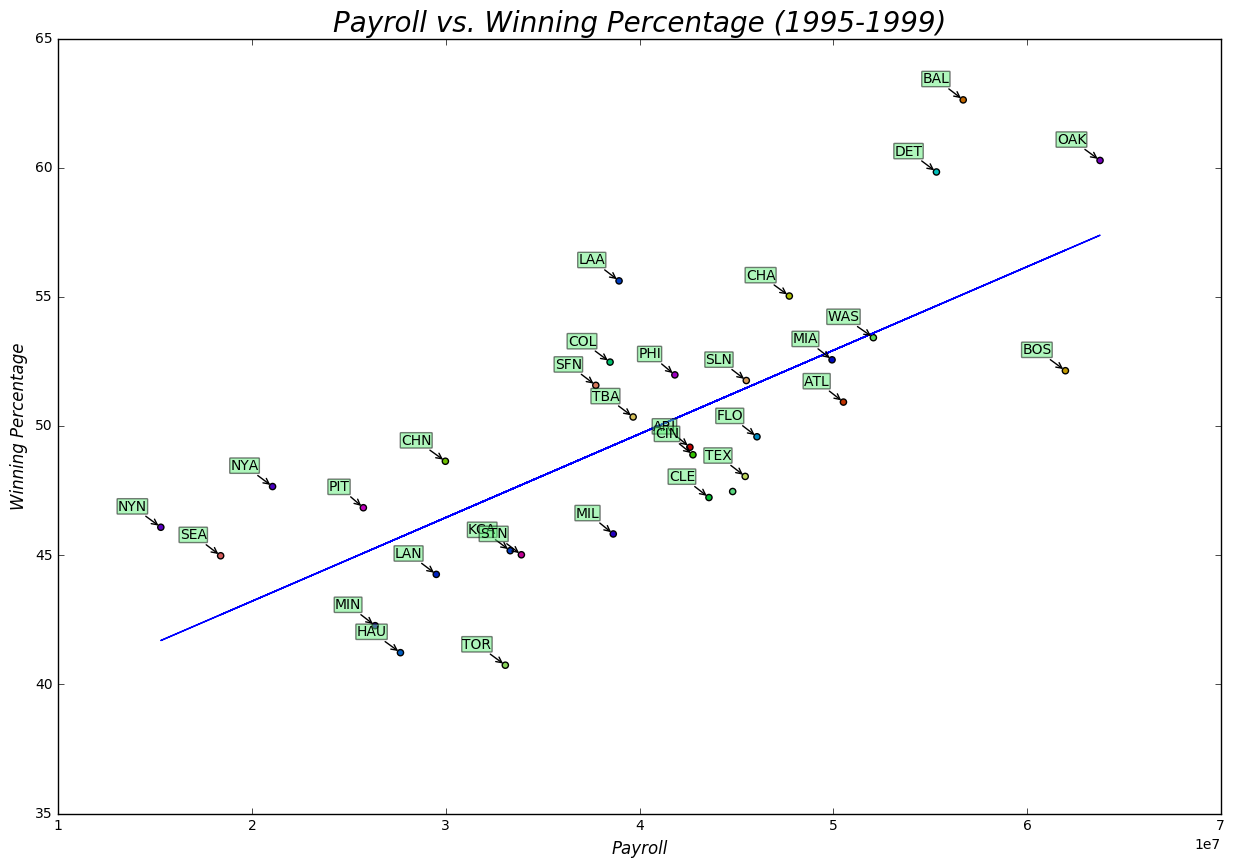

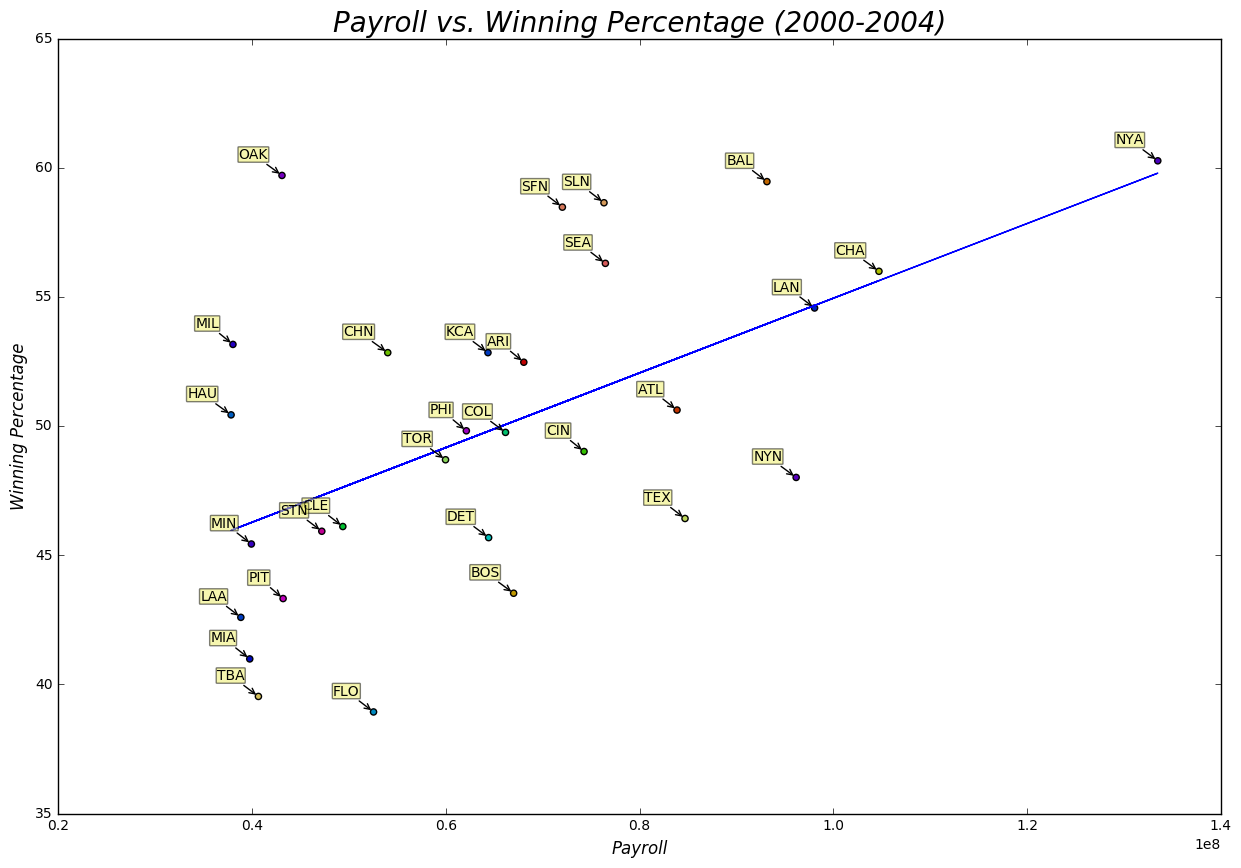

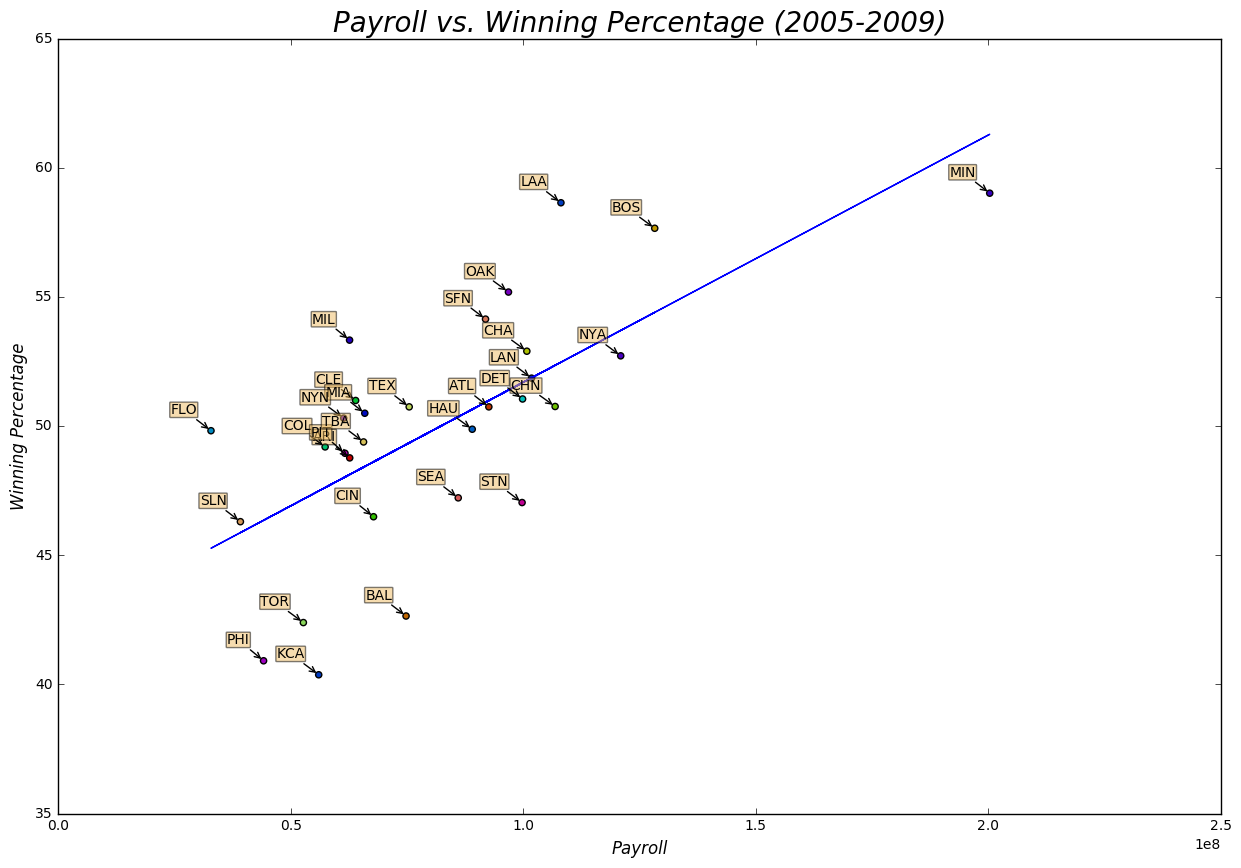

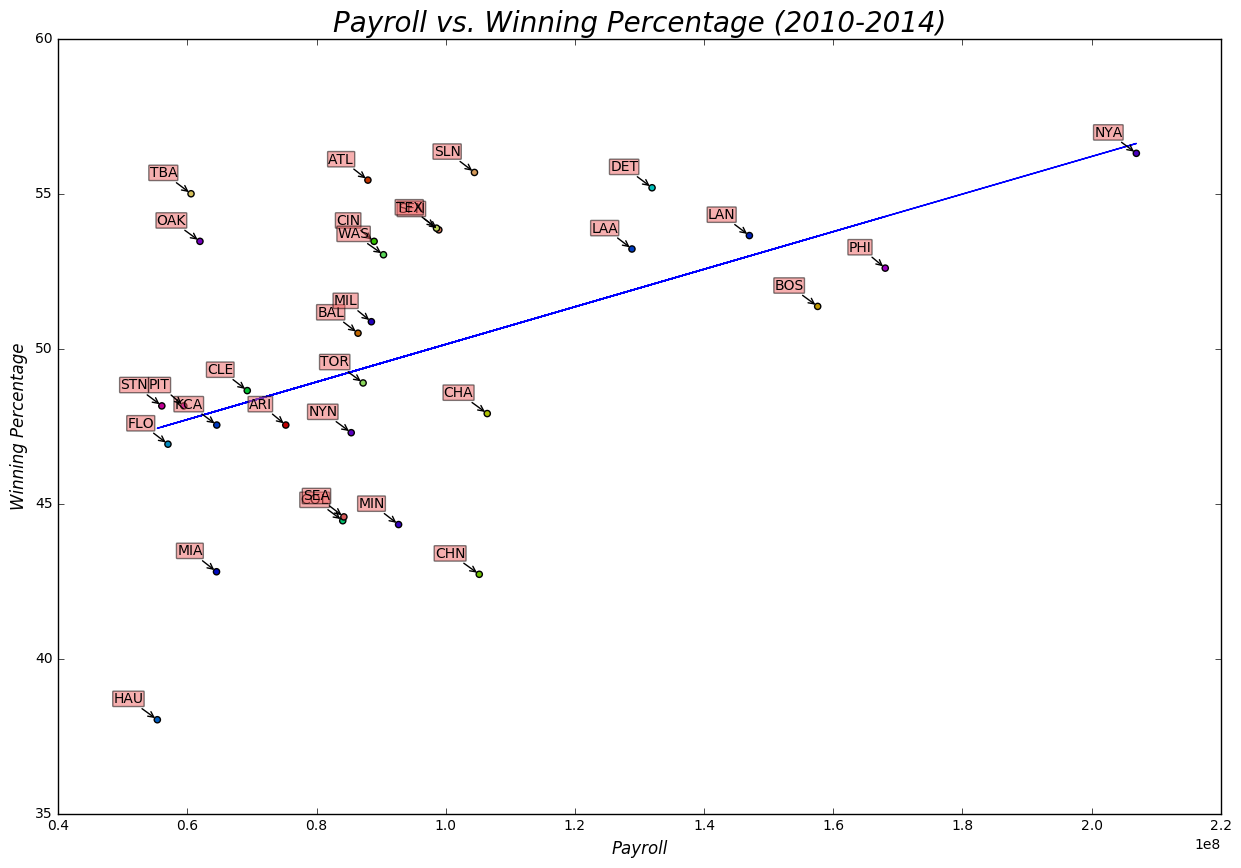

In [12]:
cut_t = base_t.copy(deep=True)
bins = [1989, 1994, 1999, 2004, 2009, 2014] #Establishes section boundaries
labels = ['First', 'Second', 'Third', 'Fourth', 'Fifth'] #Names sections
cut_t['Group'] = pd.cut(cut_t.Year, bins=bins, labels=labels)
#Divides the rows into bins and stores the categories into a new column
first, second, third, fourth, fifth = \
cut_t[cut_t['Group'] == 'First'], \
cut_t[cut_t['Group'] == 'Second'], \
cut_t[cut_t['Group'] == 'Third'], \
cut_t[cut_t['Group'] == 'Fourth'], \
cut_t[cut_t['Group'] == 'Fifth']
#Stores each section into individual variables

first = first.groupby(['Team']).mean().drop('Year', 1)
second = second.groupby(['Team']).mean().drop('Year', 1)
third = third.groupby(['Team']).mean().drop('Year', 1)
fourth = fourth.groupby(['Team']).mean().drop('Year', 1)
fifth = fifth.groupby(['Team']).mean().drop('Year', 1)
#Takes the average of each team over each five-year period
#Also drops the year column
fifth = fifth[np.isfinite(fifth['Percentage'])]
#Fixes issues with NaN values in fifth

labels = ['ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'COL', 
          'DET', 'FLO', 'HAU', 'KCA', 'LAA', 'LAN', 'MIA', 'MIL', 'MIN', 
          'NYA', 'NYN', 'OAK', 'PHI', 'PIT', 'STN', 'SEA', 'SFN', 'SLN', 
          'TBA', 'TEX', 'TOR', 'WAS'] #Labels in alphabetical order

#PLOT FOR SECTION 1 - All the other sections are the same

m, b = np.polyfit(first.Payroll, first.Percentage, 1) 
#Calculates and stores variables needed for regression line
first['Best_Fit'] = first.Payroll*m + b
#Creates new column for line of best fit
plt.scatter(x=first.Payroll, y=first.Percentage, c=colors)
#Plots the scatter plot
plt.plot(first.Payroll, first['Best_Fit'], '-')
#Plots the regression line

for label, x, y in zip(labels, first.Payroll, first.Percentage): #Loop for labels
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#60EFDA', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10) 
plt.title('Payroll vs. Winning Percentage (1990-1994)',
                  fontsize=20, style='oblique')
plt.xlabel('Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')
plt.show()

#PLOT FOR SECTION 2

m, b = np.polyfit(second.Payroll, second.Percentage, 1)
second['Best_Fit'] = second.Payroll*m + b
plt.scatter(x=second.Payroll, y=second.Percentage, c=colors)
plt.plot(second.Payroll, second['Best_Fit'], '-')

for label, x, y in zip(labels, second.Payroll, second.Percentage):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#60EF7A', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10)   
plt.title('Payroll vs. Winning Percentage (1995-1999)',
                  fontsize=20, style='oblique')
plt.xlabel('Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')
plt.show()

#PLOT FOR SECTION 3

m, b = np.polyfit(third.Payroll, third.Percentage, 1)
third['Best_Fit'] = third.Payroll*m + b
plt.scatter(x=third.Payroll, y=third.Percentage, c=colors)
plt.plot(third.Payroll, third['Best_Fit'], '-')

for label, x, y in zip(labels, third.Payroll, third.Percentage):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#EFEF60', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10) 
plt.title('Payroll vs. Winning Percentage (2000-2004)',
                  fontsize=20, style='oblique')
plt.xlabel('Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')
plt.show()

#PLOT FOR SECTION 4

m, b = np.polyfit(fourth.Payroll, fourth.Percentage, 1)
fourth['Best_Fit'] = fourth.Payroll*m + b
plt.scatter(x=fourth.Payroll, y=fourth.Percentage, c=colors)
plt.plot(fourth.Payroll, fourth['Best_Fit'], '-')

for label, x, y in zip(labels, fourth.Payroll, fourth.Percentage):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#EFBB60', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10)
plt.title('Payroll vs. Winning Percentage (2005-2009)',
                  fontsize=20, style='oblique')
plt.xlabel('Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')
plt.show()

#PLOT FOR SECTION 5

m, b = np.polyfit(fifth.Payroll, fifth.Percentage, 1)
fifth['Best_Fit'] = fifth.Payroll*m + b
plt.scatter(x=fifth.Payroll, y=fifth.Percentage, c=colors)
plt.plot(fifth.Payroll, fifth['Best_Fit'], '-')

for label, x, y in zip(labels, fifth.Payroll, fifth.Percentage):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#EF6060', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10)
plt.title('Payroll vs. Winning Percentage (2010-2014)',
                  fontsize=20, style='oblique')
plt.xlabel('Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')

plt.show()

<h3><span style="color:#009519"><u>Question 2: Statements Based on Payroll vs Percentage</u></span></h3>

From what we can see in the regression lines on each of these plots, there's a clear positive correlation between the total payroll a team received and how well they did in terms of winning percentages. Those teams that had more money to spend hired the best players, and therefore won the most games. 

If a team lied above the regression line, that means that they won more games than expected based on the amount that they paid, so they're pretty good at paying for wins. Some teams in each time period that fall under that category include the following (Those who did exceptionally well are in italics):
<ul>
    <li><b>1990-1994:</b><i> MIL, PHI, CHA, ARI, TBA,</i> HAU, ATL, LAN, SLN, SEA, CIN, NYN</li>
    <li><b>1995-1999:</b><i> LAA, DET, BAL, OAK,</i> NYN, SEA, NYA, PIT, CHN, SFN, TBA, COL, PHI, CHA</li>
    <li><b>2000-2004:</b><i> HAU, MIL, OAK, SEA, SFN, SLN, BAL,</i> CHN, KCA, ARI</li>
    <li><b>2005-2009:</b><i> FLO, MIL, SFN, OAK, LAA, BOS,</i> COL, NYM, MIA, CLE, TEX, CHA, TBA</li>
    <li><b>2010-2014:</b><i> OAK, TBA, ATL, CIN, WAS, TEX, SFN, SLN, DET,</i> BAL, MIL, LAA, LAN</li>
</ul>

MIL, TBA, OAK, SFN, and TBA all show up in at least 4 of the time periods in the lists above, showing that they have consistently been good at paying for wins across these time periods. 

The Oakland Athletics started out right by the regression line, but as time went on they got better. In the second time period they had the most payroll out of all the teams, but they also had the second highest winning percentage, so they spent their money well enough. However, from 2000 onward we can see that the Oakland Athletics team was able to retain that high winning percentage with a much smaller payroll, almost less than all the other teams in the third and fifth time periods. We can clearly see that they found some way to get good players on a smaller budget, which is what the story of <i>Moneyball</i> depicts.

<h2><u><i>Part 3: Data Transformation</i></u></h2>

<h3><span style="color:#004895"><u>Problem 5: Standardization Across the Years</u></span></h3>

For this part, we're going to adjust our data by <b>standardizing</b> it so that we can get more information out of it in terms of statistics. To do this, we iterate through each and every row in our copy <i>norm_t</i>, and do the following steps:

<ol>
    <li>Grab the year the row belongs to from the <b>Year</b> column.</li>
    <li>Take the year's <b>Mean</b> and <b>Standard Deviation</b>.</li>
    <li>Make a new column called <b>Normalized</b> = (Payroll - Mean) / STD </li>
</ol>

The new table with the <b>Normalized</b> column is shown below:

In [13]:
norm_t = base_t.copy(deep=True)

i = 0
for r in norm_t.iterrows():
    year = norm_t.iat[i, 0] #Gets year of col
    mean = norm_t[norm_t.Year == year].Payroll.mean(axis=0) #Gets mean
    std = norm_t[norm_t.Year == year].Payroll.std(axis=0) #Gets deviation
    norm_t = norm_t.set_value(i, 'Normalized', ((norm_t.iat[i,2] - mean)/std))
    #Sets value of new column
    i += 1
    
norm_t

Year Team      Payroll  Percentage  Normalized
0    1990  ATL   14555501.0   40.123457   -0.667275
1    1990  BAL    9680084.0   47.204969   -1.959861
2    1990  BOS   20558333.0   54.320988    0.924213
3    1990  CAL   21720000.0   49.382716    1.232198
4    1990  CHA    9491500.0   58.024691   -2.009859
5    1990  CHN   13624000.0   47.530864   -0.914238
6    1990  CIN   14370000.0   56.172840   -0.716456
7    1990  CLE   14487000.0   47.530864   -0.685437
8    1990  DET   17593238.0   48.765432    0.138098
9    1990  HOU   18330000.0   46.296296    0.333431
10   1990  KCA   23361084.0   46.583851    1.667287
11   1990  LAN   21318704.0   53.086420    1.125805
12   1990  MIN   14602000.0   45.679012   -0.654948
13   1990  ML4   19719167.0   45.679012    0.701731
14   1990  MON   16586388.0   52.469136   -0.128841
15   1990  NYA   20912318.0   41.358025    1.018063
16   1990  NYN   21722834.0   56.172840    1.232949
17   1990  OAK   19887501.0   63.580247    0.746360
18   1990  PHI   13173667.0   47.530864   -1.033631
19   1990  PIT   15556000.0   58.641975   -0.402020
20   1990  SDN   17588334.0   46.296296    0.136798
21   1990  SEA   12553667.0   47.530864   -1.198008
22   1990  SFN   19335333.0   52.469136    0.599968
23   1990  SLN   20523334.0   43.209877    0.914934
24   1990  TEX   14874372.0   51.234568   -0.582735
25   1990  TOR   17756834.0   53.086420    0.181472
26   1991  ATL   18403500.0   58.024691   -0.750621
27   1991  BAL   17519000.0   41.358025   -0.878909
28   1991  BOS   35167500.0   51.851852    1.680823
29   1991  CAL   33060001.0   50.000000    1.375152
..    ...  ...          ...         ...         ...
700  2014  BAL  103416000.0   59.259259    0.080143
701  2014  BOS  139019929.0   43.827160    0.860602
702  2014  CHA   81830500.0   45.061728   -0.393024
703  2014  CHN   65522500.0   45.061728   -0.750504
704  2014  CIN  108217500.0   46.913580    0.185395
705  2014  CLE   82151899.0   52.469136   -0.385978
706  2014  COL   95403500.0   40.740741   -0.095495
707  2014  DET  152855500.0   55.555556    1.163886
708  2014  HOU   35116300.0   43.209877   -1.417026
709  2014  KCA   74594075.0   54.938272   -0.551650
710  2014  LAA  121988250.0   60.493827    0.487258
711  2014  LAN  217014600.0   58.024691    2.570291
712  2014  MIA   41836900.0   47.530864   -1.269707
713  2014  MIL  101217000.0   50.617284    0.031940
714  2014  MIN   83762500.0   43.209877   -0.350673
715  2014  NYA  197543907.0   51.851852    2.143482
716  2014  NYM   54806990.0         NaN   -0.985395
717  2014  NYN   30750000.0   48.765432   -1.512738
718  2014  OAK   72408400.0   54.320988   -0.599561
719  2014  PHI  180944967.0   45.061728    1.779624
720  2014  PIT   77178000.0   54.320988   -0.495009
721  2014  SDN   75685700.0   47.530864   -0.527721
722  2014  SEA   92531100.0   53.703704   -0.158460
723  2014  SFG  143510167.0         NaN    0.959031
724  2014  SFN   20000000.0   54.320988   -1.748384
725  2014  SLN  120693000.0   55.555556    0.458865
726  2014  TBA   72689100.0   47.530864   -0.593408
727  2014  TEX  112255059.0   41.358025    0.273901
728  2014  TOR  109920100.0   51.234568    0.222717
729  2014  WAS  131983680.0   59.259259    0.706364

[730 rows x 5 columns]

<h3><span style="color:#004895"><u>Problem 6: Replotting with Standardized Payroll</u></span></h3>

Now, we simply repeat the process we did in <b>Problem 4</b>, this time using the <b>Normalized</b> column as the x-axis instead. The plots are shown below:

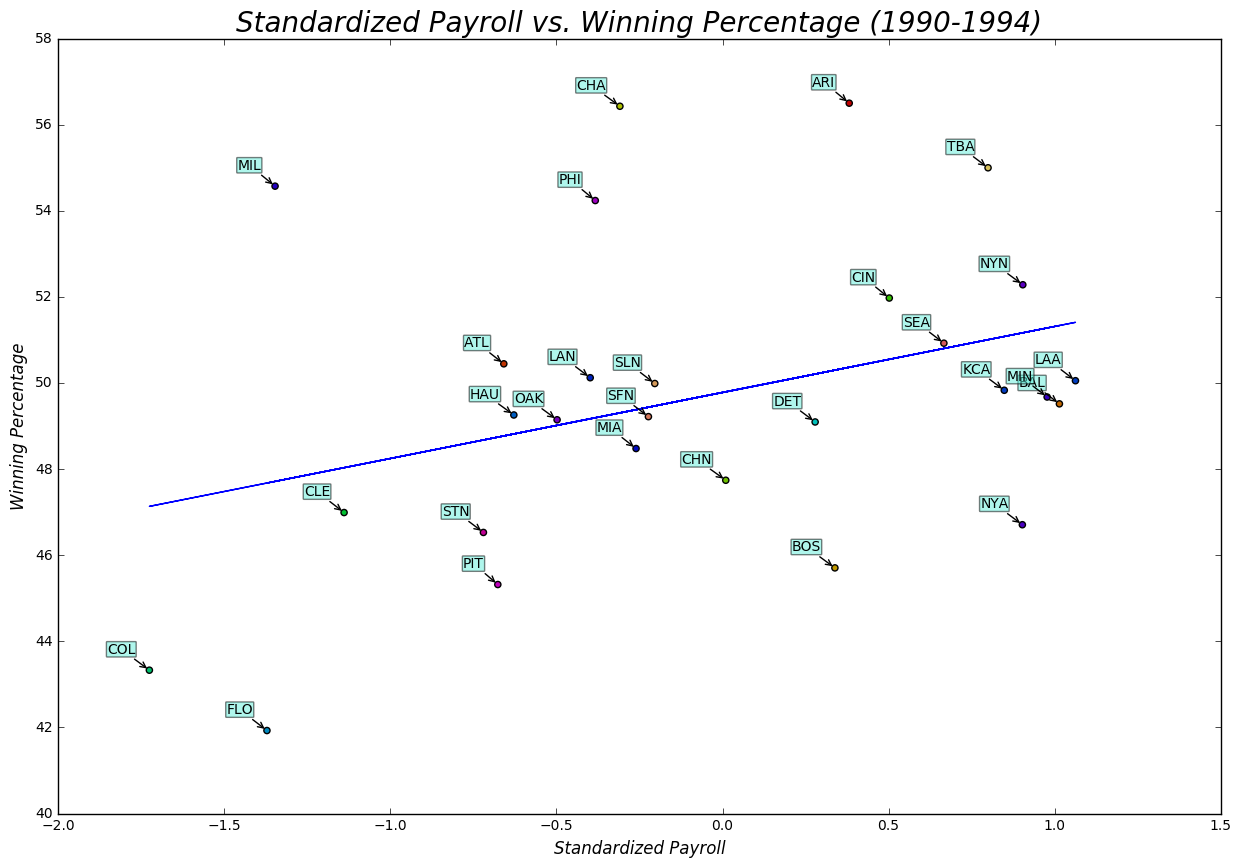

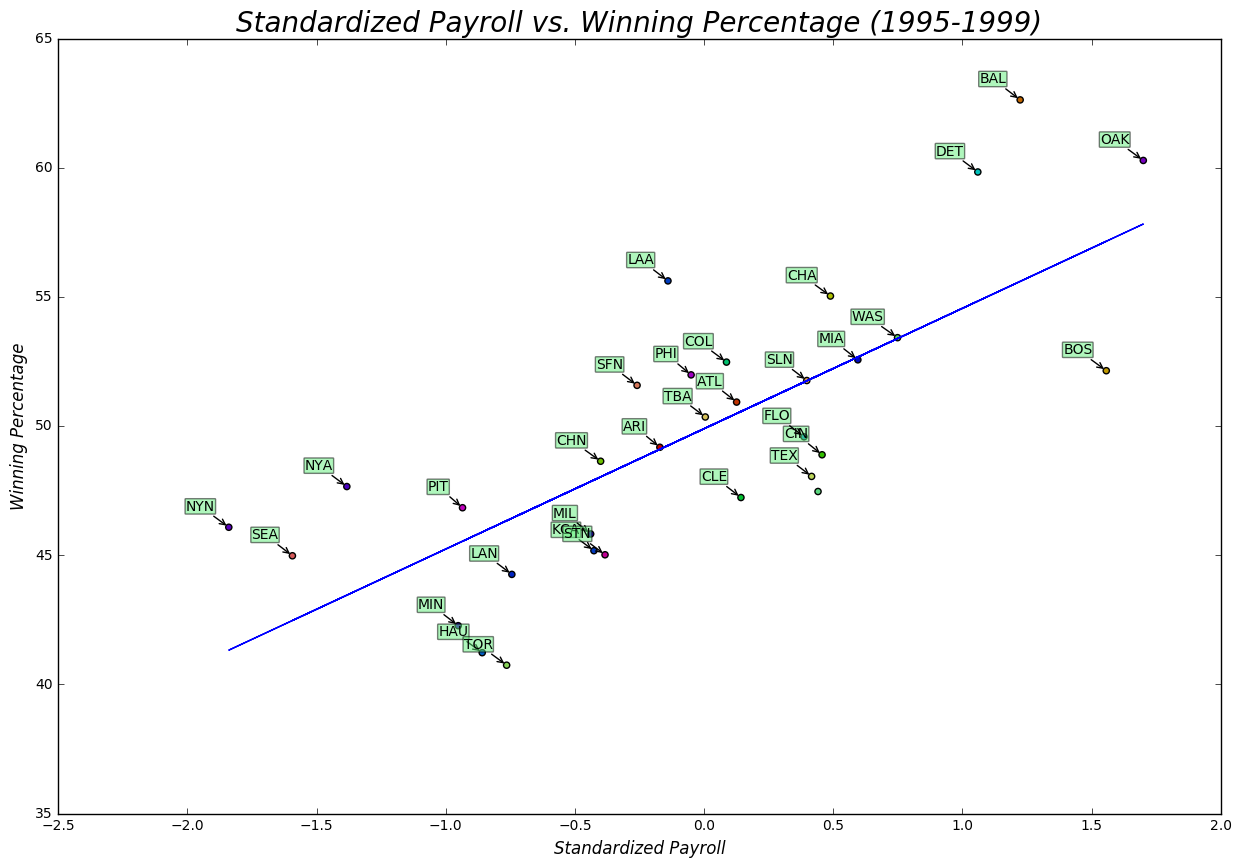

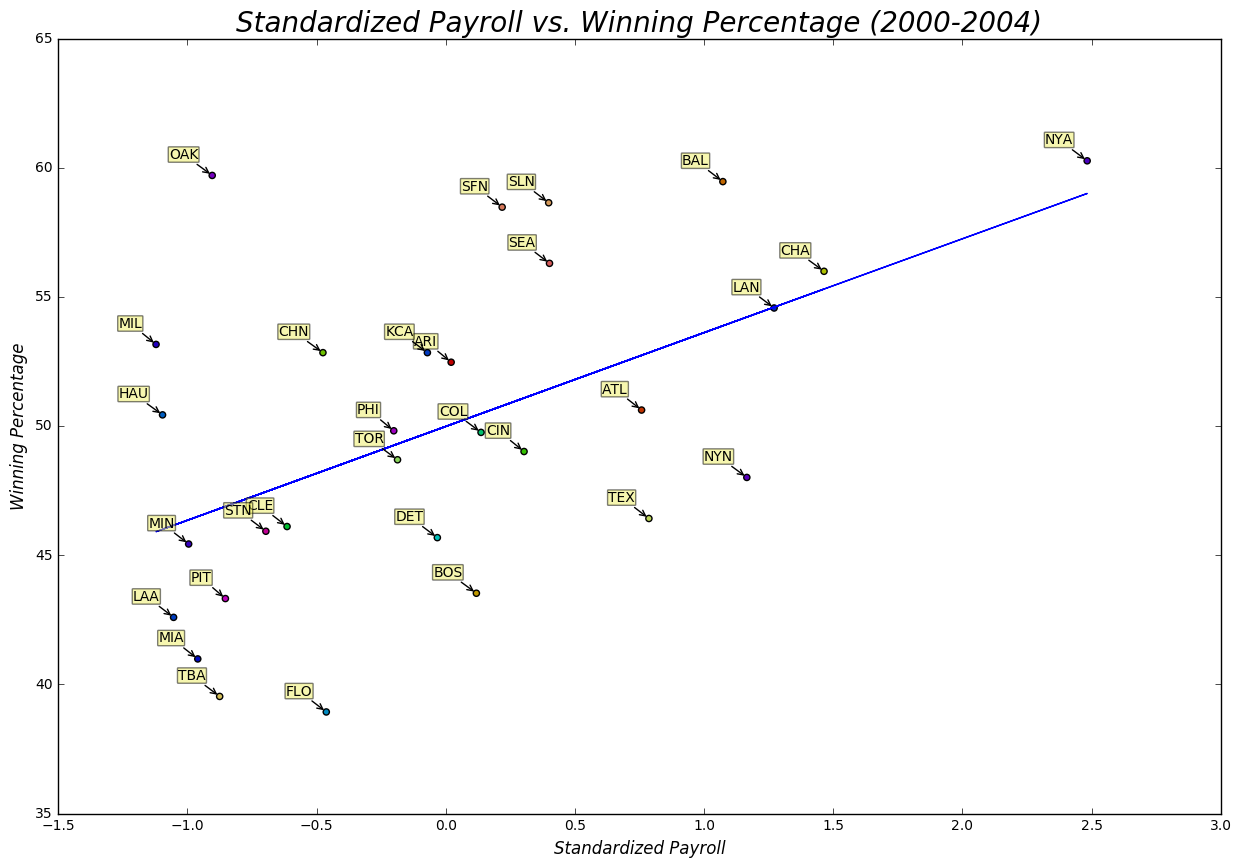

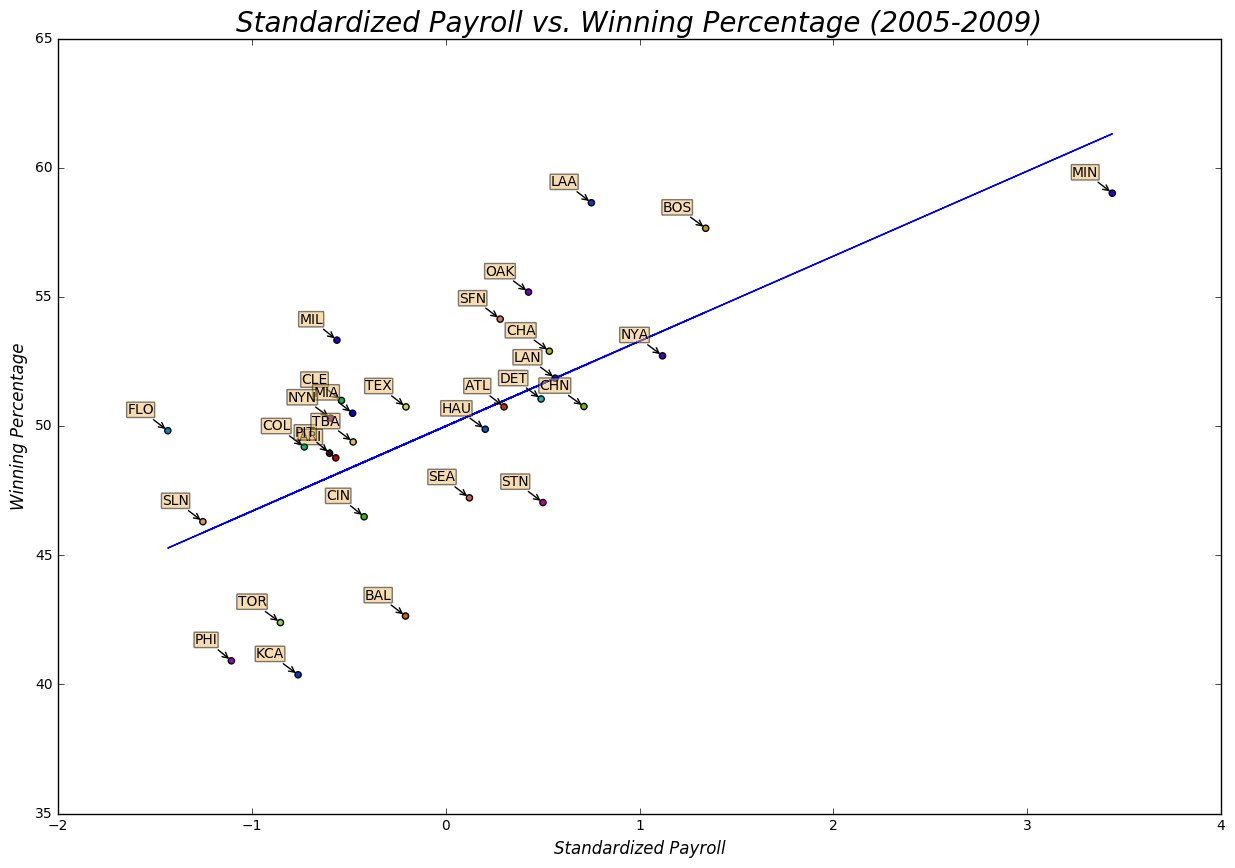

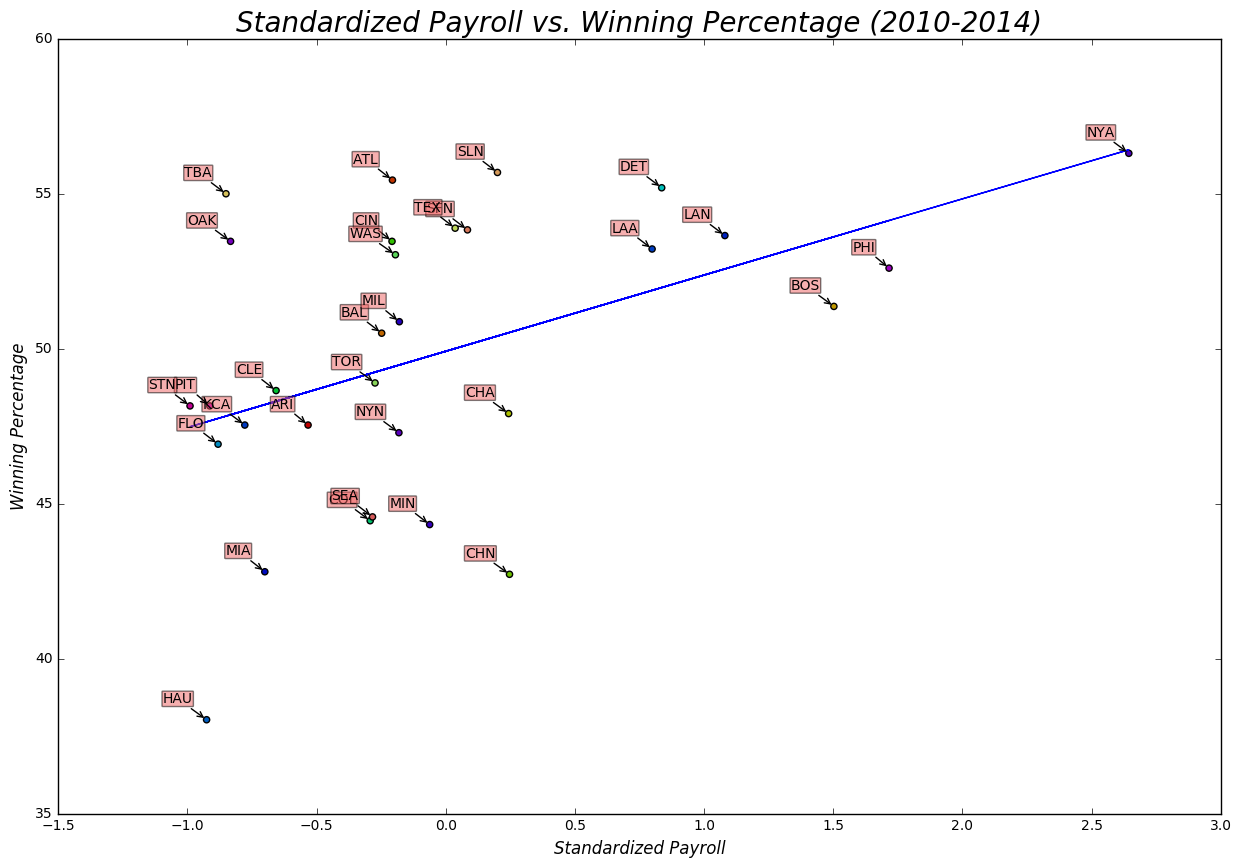

In [14]:
cut_t = norm_t.copy(deep=True)
#norm_t = norm_t.drop(['level_0', 'index'], 1)
bins = [1989, 1994, 1999, 2004, 2009, 2014] #Establishes section boundaries
labels = ['First', 'Second', 'Third', 'Fourth', 'Fifth'] #Names sections
cut_t['Group'] = pd.cut(cut_t.Year, bins=bins, labels=labels)
#Divides the rows into bins and stores the categories into a new column
first, second, third, fourth, fifth = \
cut_t[cut_t['Group'] == 'First'], \
cut_t[cut_t['Group'] == 'Second'], \
cut_t[cut_t['Group'] == 'Third'], \
cut_t[cut_t['Group'] == 'Fourth'], \
cut_t[cut_t['Group'] == 'Fifth']
#Stores each section into individual variables

first = first.groupby(['Team']).mean().drop('Year', 1)
second = second.groupby(['Team']).mean().drop('Year', 1)
third = third.groupby(['Team']).mean().drop('Year', 1)
fourth = fourth.groupby(['Team']).mean().drop('Year', 1)
fifth = fifth.groupby(['Team']).mean().drop('Year', 1)
#Takes the average of each team over each five-year period
#Also drops the year column
fifth = fifth[np.isfinite(fifth['Percentage'])]
#Fixes issues with NaN values in fifth

labels = ['ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'COL', 
          'DET', 'FLO', 'HAU', 'KCA', 'LAA', 'LAN', 'MIA', 'MIL', 'MIN', 
          'NYA', 'NYN', 'OAK', 'PHI', 'PIT', 'STN', 'SEA', 'SFN', 'SLN', 
          'TBA', 'TEX', 'TOR', 'WAS'] #Same labels as before

#PLOT FOR SECTION 1

m, b = np.polyfit(first.Normalized, first.Percentage, 1)
first['Best_Fit'] = first.Normalized*m + b
plt.scatter(x=first.Normalized, y=first.Percentage, c=colors)
plt.plot(first.Normalized, first['Best_Fit'], '-')

for label, x, y in zip(labels, first.Normalized, first.Percentage):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#60EFDA', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10) 
plt.title('Standardized Payroll vs. Winning Percentage (1990-1994)',
                  fontsize=20, style='oblique')
plt.xlabel('Standardized Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')
plt.show()

#PLOT FOR SECTION 2

m, b = np.polyfit(second.Normalized, second.Percentage, 1)
second['Best_Fit'] = second.Normalized*m + b
plt.scatter(x=second.Normalized, y=second.Percentage, c=colors)
plt.plot(second.Normalized, second['Best_Fit'], '-')

for label, x, y in zip(labels, second.Normalized, second.Percentage):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#60EF7A', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10) 
plt.title('Standardized Payroll vs. Winning Percentage (1995-1999)',
                  fontsize=20, style='oblique')
plt.xlabel('Standardized Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')
plt.show()

#PLOT FOR SECTION 3

m, b = np.polyfit(third.Normalized, third.Percentage, 1)
third['Best_Fit'] = third.Normalized*m + b
plt.scatter(x=third.Normalized, y=third.Percentage, c=colors)
plt.plot(third.Normalized, third['Best_Fit'], '-')

for label, x, y in zip(labels, third.Normalized, third.Percentage):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#EFEF60', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10) 
plt.title('Standardized Payroll vs. Winning Percentage (2000-2004)',
                  fontsize=20, style='oblique')
plt.xlabel('Standardized Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')
plt.show()

#PLOT FOR SECTION 4

m, b = np.polyfit(fourth.Normalized, fourth.Percentage, 1)
fourth['Best_Fit'] = fourth.Normalized*m + b
plt.scatter(x=fourth.Normalized, y=fourth.Percentage, c=colors)
plt.plot(fourth.Normalized, fourth['Best_Fit'], '-')

for label, x, y in zip(labels, fourth.Normalized, fourth.Percentage):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#EFBB60', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10) 
plt.title('Standardized Payroll vs. Winning Percentage (2005-2009)',
                  fontsize=20, style='oblique')
plt.xlabel('Standardized Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')
plt.show()

#PLOT FOR SECTION 5

m, b = np.polyfit(fifth.Normalized, fifth.Percentage, 1)
fifth['Best_Fit'] = fifth.Normalized*m + b
plt.scatter(x=fifth.Normalized, y=fifth.Percentage, c=colors)
plt.plot(fifth.Normalized, fifth['Best_Fit'], '-')

for label, x, y in zip(labels, fifth.Normalized, fifth.Percentage):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.05', fc='#EF6060', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

fig_size = plt.gcf()
fig_size.set_size_inches(15, 10) 
plt.title('Standardized Payroll vs. Winning Percentage (2010-2014)',
                  fontsize=20, style='oblique')
plt.xlabel('Standardized Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')

plt.show()

<h3><span style="color:#009519"><u>Question 3: Difference in Standardized Plots</u></span></h3>

You can see that although these plots may look similar to what we have in <b>Problem 4</b>, that the x-axis values are much smaller, scaled down from the millions that the <b>Payroll</b> values were. They're also centered around 0, which here is considered to be the mean, so that you can see which teams had the average amount of payroll per year as opposed to just trying to figure it out from the previous graphs.

<h3><span style="color:#004895"><u>Problem 7: Showing Expected Wins</u></span></h3>

This part has us combine all the five plots we made before into one giant graph so that we can get a single regression line that tells us the expected amount of wins based on standardized payroll for <i>all</i> teams through <i>all</i> five time periods.

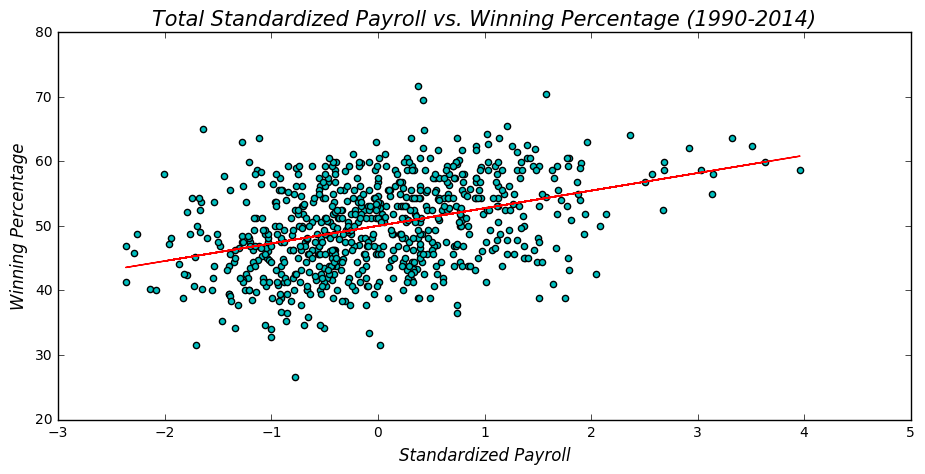

In [15]:
import warnings 
warnings.filterwarnings('ignore')

norm_t = norm_t.loc[pd.notnull(norm_t.Percentage)] 
norm_t = norm_t[np.isfinite(norm_t.Percentage)]
#Polishes up the table and deals with any rows where % is NaN.

m, b = np.polyfit(norm_t.Normalized, norm_t.Percentage, 1)
norm_t['Best_Fit'] = norm_t.Normalized*m + b
plt.scatter(x=norm_t.Normalized, y=norm_t.Percentage, c='c')
plt.plot(norm_t.Normalized, norm_t['Best_Fit'], 'r-')
plt.title('Total Standardized Payroll vs. Winning Percentage (1990-2014)',
                  fontsize=15, style='oblique')
plt.xlabel('Standardized Payroll', fontsize=12, style='oblique')
plt.ylabel('Winning Percentage', fontsize=12, style='oblique')
fig_size = plt.gcf()
fig_size.set_size_inches(11, 5) 
plt.show()
#norm_t

<h3><span style="color:#004895"><u>Problem 8: Showing Expected Wins</u></span></h3>

Now to finally piece everything together, we'll create a graph that shows the overall efficiency in payroll spending over time for a couple of teams (including the Oakland A's). 

We'll start by going row by row again and calculating the <b>Expected</b> column, representing the expected win percentage based on the formula given of <i>50 + 2.5 x <b>Normalized</b></i>. We then use that to calculate <b>Efficiency</b>, which is equal to <b>Percentage - Expected</b>. We then simply plot those values for a couple of teams and see how they did overall through these 25 years of playing.

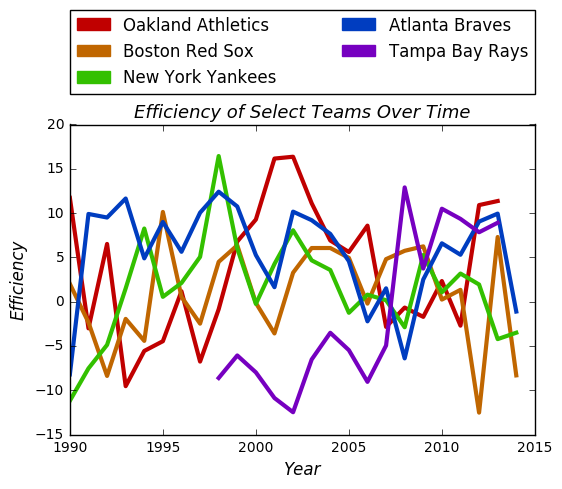

In [16]:
i = 0
for r in norm_t.iterrows():
    norm_t = norm_t.set_value(i, 'Expected', 50 + 2.5*(norm_t.iat[i,4]))
    #Calculates value for expected win percentage
    norm_t = norm_t.set_value(i, 'Efficiency', (norm_t.iat[i,3] - norm_t.iat[i,6]))
    #Calculates value for overall efficiency
    i += 1
                                      
eff_OAK = norm_t[(norm_t.Team == 'OAK')]
eff_BOS = norm_t[(norm_t.Team == 'BOS')]
eff_NYA = norm_t[(norm_t.Team == 'NYA')]
eff_ATL = norm_t[(norm_t.Team == 'ATL')]
eff_TBA = norm_t[(norm_t.Team == 'TBA')]
#Grabs rows from 5 specific teams

plt.plot(eff_OAK.Year, eff_OAK.Efficiency, c='#C00000', linewidth=3)
plt.plot(eff_BOS.Year, eff_BOS.Efficiency, c='#C06600', linewidth=3)
plt.plot(eff_NYA.Year, eff_NYA.Efficiency, c='#33C000', linewidth=3)
plt.plot(eff_ATL.Year, eff_ATL.Efficiency, c='#003DC0', linewidth=3)
plt.plot(eff_TBA.Year, eff_TBA.Efficiency, c='#7600C0', linewidth=3)
#Plots each of the teams on the same line plot.

eff_keys = [mp.Patch(color='#C00000', label='Oakland Athletics'),
            mp.Patch(color='#C06600', label='Boston Red Sox'),
            mp.Patch(color='#33C000', label='New York Yankees'),
            mp.Patch(color='#003DC0', label='Atlanta Braves'),
            mp.Patch(color='#7600C0', label='Tampa Bay Rays')]

plt.legend(bbox_to_anchor=(0., 1.1, 1., .1), loc=3,
           ncol=2, mode="expand", borderaxespad=0., 
           handles=eff_keys)
plt.title('Efficiency of Select Teams Over Time',
                  fontsize=13, style='oblique')
plt.xlabel('Year', fontsize=12, style='oblique')
plt.ylabel('Efficiency', fontsize=12, style='oblique')

plt.show()

<h3><span style="color:#009519"><u>Question 4: How Good was Oakland?</u></span></h3>

From this plot here, you can clearly see how well each team performed in terms of how well their money was spent buying players. You couldn't really see that  with the pie charts since all we saw was the distribution and we could talk about things like the mean and variance. Here we can actually see how well teams did over time based on the conditions we want.

And all things considered, the Oakland A's seemed to do pretty well around the early 2000s, jumping up to being <b>+16%</b> more efficient than than expected. From 2000-2005 they never dropped below <b>+5%</b>. So whatever they did clearly worked according to all this data we've displayed.